## Applied Machine Learning Final Project
### Multi-output random forest classifier on UCI thyroid dataset, by Suraj Greenlund

In this class, we have worked to understand both general principles of machine learning methods and specific details of particular machine learning techniques. For this project, you will apply what you have learned in this course to formulate and answer your own question.

**Important:** Be sure to include code and answers in the correct cells of the notebook. Otherwise you might not get full credit for your work.

Please use this notebook to turn in your work. 

Points: 20

You will be graded based on:
1. __Technical completeness__. _(12 points)_ 

Did you meet the technical requirements for the project? For instance, did you describe hyperparameter tuning and include plots, where necessary.

2. __Creativity, imagination and ambition__. _(3 points)_ 

Did you form an interesting, creative and ambitious question, and explain why it is important to answer that question?

_Note: downloading a ready-made dataset you find online (e.g. on Kaggle) and answering a question that is already defined for you will make it hard to get full points for creativity, imagination and ambition. (Unless you do something else interesting and ambitious, e.g. analyze attributes of a specific model very closely.) To get full points for creativity/imagination/ambition you will need to think a little a bit more. The bar will be higher for 5604 students._

3. __Presentation__. _(5 points)_ 

Did you do a good job presenting your results? Would your notebook make sense to a person who was not familiar with your project? You should take time to write clearly, simplify your code and explain what you are doing in your notebook. At minimum:

- Make sure your plots are well-labeled and appropriately scaled, delete code that does not work correctly, and be sure to mix code and text so that readers can easily understand your work. 
- Check out [this](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/) blog post for a nice example of how to present a data analysis clearly.
- Put yourself in the reader's shoes. What would be confusing? Annoying? Helpful?

## Question 

_Using this cell, please write a short, clear paragraph explaining what question you plan to answer in this notebook. Your question can be narrow (e.g. can we predict a dog's height from its weight) or broad (e.g. what features are important or unimportant in predicting the price of a house). Briefly describe why your question is important and how you plan to answer. Be sure to explain what is imaginative, creative or ambitious about your planned work! For instance, will you spend a lot of time defining new features, will you be working with hard-to-get data, will your work inform a major theoretical debate? Be sure to ask a question you can actually start to answer using machine learning techniques!

I wanted to explore if we can predict different types of thyroid disease using data from UCI found at https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease. Thyroid disease is prevalent in approximately 12% of the USA, and can be hard to recognize - upwards of 60% of people with thyroid disease are unaware of it. I also personally wanted to approach this issue as my father had thyroid cancer that was initially overlooked during tests, so it would be great to contribute to developing methods to better identify thyroid disorders. The data was put on Kaggle, but not in its entirety and not explained very well; thus, it doesn't look like it has been used much aside from in the professional publications listed on the page the data is hosted. 

First, I will pursue a random forest approach on the thyroid0387 dataset (20 classifiers instead of 3 in the ann dataset) using a selection features I've identified below (primarily the measured serum levels), which should be relatively simple to implement. Then, I will try incorporating an ensemble method, possible with different algorithms favoring hyper- or hypothyroidism or sub-conditions more, and then picking the highest accuracy outcome as the prediction. I also want to try developing separate algorithms for the datasets that are already separated by condition, though that may be out of scope for this project. 

The most important features will be the serum levels that were measured, as opposed to the binary features. Specifically, TSH, or thyroid stimulating hormone, levels are the most senstive to thyroid function and often measured in conjunction with the hormones T4, thyroxine, and T3, triiodothyronine. Other measures include Total T4 and T3 (TT4, and TT3, repectively), free T4 index (FTI), T4 uptake (T4U), and thyroid-binding globulin (TBG) . Some of the binary features may be dropped or less important (described in the next section), so it may be good to weigh the continuous features (serum levels measured) greater as those are more directly related to the outcome. 

## Data

_Using this cell, please write a short, clear paragraph explaining what data you will use to answer your question. You do not need to go gather custom datasets for this class, although you are welcome to do so. Just downloading data from Kaggle is fine, although you are highly encouraged to think a little harder and more creatively when you do the project. There are many, many places to find interesting datasets online related to many topics like music, politics, sports, transportation, etc. Data gathering is one way to make your project more creative, but you are not necessarily expected to take on a major data gathering effort. If applicable, describe how you plan to split between the training and test sets. You might want to check out Google's [dataset search](https://datasetsearch.research.google.com/)_


The datasets from UCI are divided into sets for binding proteins, replacement therapy, hyperthyroidism, hypothyroidism, unrelated sickness, and discordant results, as well as a few other datasets. They have weird file extensions, but are actually just csv files and so can be read by pandas. The .names files explain the different features and classes. The thyroid0387 dataset and ann dataset are additional datasets that could be used. Thyroid0387 has combined 20 classes, while the ann dataset is split into 3 classes (hyper, hypo, and normal), but it is not explained which number corresponds to which condition. I would like to build a model to predict not just hyper- and hypothyroidism, but the more specific conditions related to them, so I will be using the thyroid0387 dataset and all 20 classes in a multioutput random forest classifier. 
I will use sklearn's train_test_split to create my train and test datasets, and will likely make a disproportionate split favoring the training data, as medical data especially needs very large training sets to create well-performing screening models. 

The most important features will be the serum levels that were measured, as opposed to the binary features. Some of the binary features, such as the query_serumtype columns can be dropped as they do not relate to the outcome. Below, I will discuss the attributes with a brief reasoning for whether they are to be droped, followed by descriptions of the various classes. 


# Attributes/Inputs 
In order to determine the classes listed above, we have the following data to train with.

#### age: 
Continuous, marginally related to thyroid disorders (younger=less likely). Keeping for now, might remove.

#### sex: 
Binary, marginally related to thyroid disorders (more women have thyroid disorders). Keeping for now, might remove. 

#### on thyroxine: 
Binary, whether the patient is taking thyroxine. This needs to be kept as the replacement therapy classes should only be positive if this is true.

#### query on thyroxine: 
Binary, if it was asked whether the patient was taking thyroxine. Not necessary, drop. 

#### on antithyroid medication: 
Binary, whether patient is taking antithyroid medication. Directly relates to output (patient only takes this if they are hyperthyroid), so should be dropped.

#### sick:
Binary, whether patient has a non-thyroid illness. This is one of the classes, so should be dropped.

#### pregnant:
Binary, whether patient is pregnant. This can affect TBG levels but is not related to thyroid disease. 

##### thyroid surgery:
Binary, whether patient has had tyhroid surgery. Directly relates to output (patient was hyperthyroid and is likely hypothyroid), so should be dropped.

#### I131 treatment:
Binary, whether patient is on I-31 treatment. Directly relates to output (only taken when patient is hyperthyroid), so should be dropped. 

#### query hypothyroid:
Binary, whether patient is hypothyroid (or was asked?). These don't always match up with the class column, and should be dropped either way. 

#### query hyperthyroid:
Binary, whether patient is hyperthyroid (or was asked?). These don't always match up with the class column, and should be dropped either way. 

#### lithium:
Binary, whether patient is taking lithium (for hyperthyroidism). Directly relates to output, so should be dropped.

#### goitre:
Binary, whether patient has goitre. To be dropped as it is a class/output.

#### tumor:
Binary, whether patient has a tumor. Directly relates to output, so should be dropped.

#### hypopituitary:
Binary, whether patient has hypopituitary function. Directly relates to output (will always be hypothyroid), so should be dropped.

#### psych:
Binary. This is either whether the patient has had a psych eval or whether they have had a normal psych eval. Psychiatric symptoms of thyroid disease include forgetfulness, fatigue, mental slowness, & inattention.

#### TSH measured:
Whether hormone level was measured. Can be dropped.

#### TSH:
TSH hormone level. One of the most important metrics for determining thyroid function. Definitely keep.

0.2< normal tsh< 6

#### T3 measured:
Whether hormone level was measured. Can be dropped.

#### T3:
T3 hormone level. One of the most important metrics for determining thyroid function. Definitely keep. 

1.2< normal T3 <2.8

#### TT4 measured:
Whether hormone level was measured. Can be dropped.

#### TT4:
Total T4 (bound and unbound T4) hormone level. Over 99% over the T4 in the body is bound to TBG and inert during that time, TT4 is not as important a measure as free T4. However, it will still be good to keep this. 

60< normal TT4 <150

#### T4U measured:
Whether hormone level was measured. Can be dropped.

#### T4U:
T4 uptake. This measures the binding capacity and is involved in the conversion from T4 to T3. While not as common a measure, it is still good to keep.

0.6< normal t4U <1.25

#### FTI measured:
Whether hormone level was measured. Can be dropped.

#### FTI:
Free T4 index. This is another very important measure and the best one concerning T4. Definitely keep. 
65<normal fti<155

#### TBG measured:
Whether hormone level was measured. Can be dropped.

#### TBG:
Thyroid-binding globulin protein levels. Important for assessing binding protein conditions. As binding protein condition is a class, it is important to keep.

12< normal tbg <30

#### referral source:
Source of data. Can be dropped. Also has patient ID on it, to be removed. 

#### class
Output. Obviously keep.

# Classses/Output - Thyroid Conditions
Categories as outlined in thyroid0387.names text file along with description of the conditions.


### Hyperthyroid conditions
Hyperthyroid conditions are related to an overproduction of thyroid hormones, such as thyroxine (T4), by the thyroid gland. They are often treated with Radio-Iodine therapy (I-31) or with thyroid removal and subsequent hormone replacement therapy with synthetic thyroxine.

#### A. hyperthyroid 
Hyperthyroidism causes increased metabolic function, resulting in sudden, unexpected weight loss, rapid heartbeat, sweating, fatigue, tremors, & heat sensitivity. Thyroid cancer can cause hyperthyroidism, as well as viruses and radiation. 

#### B. T3 toxic 
Characterized by high T3 levels and suppressed TSH (thyroid stimulating hormone) levels. T4 is typically normal. Can be caused by iodine deficiency or Graves disease.

#### C. toxic goitre 
Diffuse toxic goiter, AKA Graves Disease. This is the most common form of hyperthyroidism. Characterized by low TSH, high TSI, and high T3 and T4. Eventually causes swelling of the thyroid gland (goiter). 

#### D. secondary toxic 
Also known as toxic (multi)nodular goiter or Plummers Disease. A rare form of hyperthyroidism, causes severe swelling of thyroid nodules. Characterized by low or suppressed TSH but relatively normal T3, T4, TT3, and TT4. 

### Hypothyroid conditions:
Hypothyroid conditions are related to a lack of production of thyroid hormones, such as thyroxine, by the thyroid gland. They are often treated with hormone replacement with a synthetic form of thyroxine.

#### E. hypothyroid
Hypothyroidism results in lower metabolic function, resulting in unexpected weight gain, slow or irregular heartbeat, muscle and joint pain and stiffness, dry skin and hair, puffy face, depression, & cold sensitivity. Most commonly caused by Hashimoto's thyroiditis, and autoimmune disease. 

#### F. primary hypothyroid
Characterized by elevated serum TSH and low free T4. 

#### G. compensated hypothyroid
The pituitary gland has to overwork the thyroid gland to maintain normal thyroid hormone levels. This can be a result of radiation exposure or a failing thyroid gland. 

#### H. secondary hypothyroid
Characterized by normal or low serum TSH and low free T4. 


### Binding protein:
Thyroid-binding globulin is a protein produced in the liver. It reversibly binds to the hormones T4 and T3 to transport them through the bloodstream and delivers them to tissues where they mediate metabolic function. 

#### I.	increased binding protein
Characterized by excess TBG. This can be caused by pregnancy, liver failure, or hypothyroidism, among others.  

#### J.	decreased binding protein
Characterized by low TBG. This can be caused by liver disease, renal disease, or hyperthyroidism, among others. Typically accompanied by low TT4 and TT3 levels. 

### General health:

#### K.	concurrent non-thyroidal illness
Patient has an illness that is not related to the thyroid but may cause temporary changes in thyroid function while illness persists. 

### Replacement therapy:
A person with hypothyroidism or a removed thyroid will typically need to take a synthetic form of thyroxine. 

#### L.	consistent with replacement therapy
Hypothyroid symptoms begin to go away and body functions as normal. 

#### M.	underreplaced
The body is still in deficit of thyroid hormones - hypothyroidism symptoms persist. 

#### N.	overreplaced
The body has excess thyroid hormones, hyperthyroid symptoms may develop. 

### Antithyroid treatment:

#### O.	antithyroid drugs
Other drugs to supress thyroid function

#### P.	I131 treatment
Radioactive Iodine treatment ablates (destroys) thyroid tissue to reduce thyroid function. Often used as a thyroid cancer treatment, and can accompany partial thyroid removal.

#### Q.	surgery
Removal of part of all of the thyroid gland. Partial removal may be accompanied by I-31 treatment.

### Miscellaneous:

#### R.	discordant assay results
There are tests that are conflicting, for example, one test may indicate hyporthyroidism while another might indicate normal function. This can occur due to the presence of thyroid hormone autoantibodies (THaabs) interfering with test results. Patients with mild forms of Hashimoto's disease, for example, would have high THaabs but may actually have normal thyroid function (euthyroid) and not present hypothyroid symptoms. 

#### S.	elevated TBG
Elevated TBG for other reasons, such as pregnancy.

#### T.	elevated thyroid hormones
Elevated thyroid hormones with no professional diagnosis


## Data preprocessing

In [1]:
## Code for data preprocessing 

# Include your code to load, clean and split data in this cell. You must complete this step in the project.

import pandas as pd

####################################################################################################################
# thyroid087 dataset containing 20 classes
thyroid0387=pd.read_csv('thyroid0387.data', header=None, delim_whitespace=True)

col_labels=['age',
'sex',
'on thyroxine',
'query on thyroxine',
'on antithyroid medication',
'sick',
'pregnant',
'thyroid surgery',
'I131 treatment',
'query hypothyroid',
'query hyperthyroid',
'lithium',
'goitre',
'tumor',
'hypopituitary',
'psych',
'TSH measured',
'TSH',
'T3 measured',
'T3',
'TT4 measured',
'TT4',
'T4U measured',
'T4U',
'FTI measured',
'FTI',
'TBG measured',
'TBG',
'referral source',
'class'];

# remove the patient IDs 

thyroid0387.columns=col_labels;
thyroid0387['class']=thyroid0387['class'].str.strip('.|0123456789');

# drop unnecessary columns, can add more if needed     
cols2drop = ['query on thyroxine',
'on antithyroid medication',
'sick',
'thyroid surgery',
'I131 treatment',
'query hypothyroid',
'query hyperthyroid',
'lithium',
'goitre',
'tumor',
'hypopituitary',
'psych',
'TSH measured',
'T3 measured',
'TT4 measured',
'T4U measured',
'FTI measured',
'TBG measured',
'referral source'];

thyroid0387=thyroid0387.drop(columns=cols2drop)

# since thyroid 0387 contains 20 classes, I will try building a multiclass random forest classifier
# print(thyroid0387)


## Model selection and tuning

_Using this cell, please write a short, clear paragraph explaining how you selected and tuned your model for the project. You must answer the following questions in this cell (1) Why is your model an appropriate choice for your data? (2) What hyperparameters does your model have and how did you select them? (3) What features did you choose and why?_

Since there are 20 different classes for my model to predict, I will be making a multioutput random forest classifier. I decided to go with a random forest [as this paper found that it performed the best for one of the thyroid datasets from the same UCI repository.](https://ieeexplore-ieee-org.colorado.idm.oclc.org/document/9002284)
I decided to instead try to predict the higher-resolution details of thyroid disease, so my model instead is predicting 20 classes instead of 3, which are all outlined in the thyroid0387.names file and described above. This necessitates a multi-out model. While the paper linked does discuss the high performance of the SVM model, I decided to stick with just the one classifier for now. 

I did add 2 columns to my classes, one each for the general hyper- and hypothyroid categories. While the thyroid0387.names text file does show that hyperthyroid and hypothyroid are both classes, they were diagnosed in a specific manner and did not always show up in conjunction with another subcategory (for example, hyperthyroid and toxic goitre), which is why I made the general categories. Because there are so many classes, a multiout model could have better precision/recall for one class than another, so I would be able to see if the model performs better for the general classes compared to the more specific conditions. 

In my tuning, I varied the max_depth and n_estimators hyperparamters and stored the precision, recall, and f1 as the code iterated through them, and then plotted the metrics which I used to decide what hyperparamters to go with. A screening blood test for thyroid disease would generally be looking at TSH levels primarily, and we would generally also want to maximize recall in an attempt to capture the majority of true positives (those with some sort of thyroid disease), where we can then use a test with higher precision to isolate the true positives of thyroid cancer. This 2-stage process is the general process in the medical field, with some diseases having even more stages before treatment (since, for example, we want to be sure someone has thyroid cancer before we remove their thyroid or have them undergo a similar difficult treatment process, like radiation therapy).

The features I kept were age, sex, on thyroxine, pregnant, and all the hormone levels. In the paper linked, only the hormone levels were used, but I decided to go with my own reasoning for keeping some of the other features. Thyroid disease is more prevalent in older people and women, which is why I kept those in. Pregnancy can raise thyroid hormone levels without there being thyroid disease, so I left that in as well. The thyroxine feature needed to be kept in as it was directly related to the classes for replacement therapy. I left all of the hormone levels, as those are the most important measures, with TSH being the most important. I dropped the columns for things that I though would directly affect the output, like the presence of a tumor or whether the patient was on I-131 treatment. The model could have weighed these to directly impact the prediction, which would not be very good, especially if it were to be used in a screening situation in which those features would not even be present.

The less relevant classes, such as replacement therapy that I discussed in the previous paragraph, are more related to treatment validation as opposed to disease screening, and perhaps should be left out. However, my model actually performed worse when I removed them, so I ended up leaving all of the classes in to be predicted.

In [2]:
## Feature engineering. Please include your code for feature engineering in this cell
import numpy as np
from sklearn.model_selection import train_test_split

###################### Making data numeric ##############################################################################
#lets also convert the 'sex' column to be 0 for female and 1 for male
#note: there are some unknown categories, the code below will type them to male by default
# I feel like this is okay, as the number of females outweights the males (6073 vs 2792) 
# but I could also remove those rows

thyroid0387['sex'] = (thyroid0387['sex'] == 'F').astype(int)
#print(thyroid0387['sex'][0:20])

thyroid0387['on thyroxine'] = (thyroid0387['on thyroxine'] == 't').astype(int)
#print(thyroid0387['on thyroxine'][0:20])
   
#do the same as above for the pregnancy column; 1=pregnant
thyroid0387['pregnant'] = (thyroid0387['pregnant'] == 't').astype(int)
#print(thyroid0387['pregnant'][165:175])


######################## Data Impution #####################################################################################
# First, let's drop the rows that are missing all continuous features 
#threshold includes class, age, sex, and pregnant, on_thyroxine so needs to be 6 (only 10 rows end up being dropped)
#this is something we could play with later

df = thyroid0387.dropna(thresh=6)


# We will assume the missing values are normal
# So, we create a pseudorandom series the length of the dataset with values in the normal range for each hormone measure
TSH_norm =pd.Series(np.random.uniform(0.2,6.0,len(df)))
T3_norm=pd.Series(np.random.uniform(1.2,2.8, len(df)))
TT4_norm=pd.Series(np.random.uniform(60, 150,len(df)))
T4U_norm=pd.Series(np.random.uniform(0.6,1.25,len(df)))
FTI_norm=pd.Series(np.random.uniform(65,155,len(df)))
TBG_norm=pd.Series(np.random.uniform(12, 30,len(df)))

# first convert the features to numeric, which replaces the ?'s with NaN
for features in ['TSH','T3','TT4','T4U','FTI','TBG']:
    thyroid0387[features]=pd.to_numeric(thyroid0387[features], errors='coerce')
    
# now, we can fill the NaNs with the values from the pseudorandomly generated series of normal values
thyroid0387['TSH']=thyroid0387['TSH'].fillna(TSH_norm)
thyroid0387['T3']=thyroid0387['T3'].fillna(T3_norm)
thyroid0387['TT4']=thyroid0387['TT4'].fillna(TT4_norm)
thyroid0387['T4U']=thyroid0387['T4U'].fillna(T4U_norm)
thyroid0387['FTI']=thyroid0387['FTI'].fillna(FTI_norm)
thyroid0387['TBG']=thyroid0387['TBG'].fillna(TBG_norm)


################ Turning our classes into a multiclassifier Dataset ########################################################
#as shown in thyroid0387.names, patients can have multiple diagnoses, so this is actually a multiclass/multioutput problem
# we need to make an array of n_patients x n_classes that is binary for each class output
# there are 20 classes
Y = (thyroid0387['class'])

# first we create an array full of zeros, then we will change each index to a 1 where necessary (positive for that condition)
# let's go ahead and add 2 more columns, 1 for general hyperthyroid and 1 for general hypothyroid
# however, according to thyroid0387.names, A is hyperthyroid and E is hypothyroid? 
# Since they have their own reasons for diagnosis (ie not everything hyperthyroid is labelled as both hyperthyroid and the sub-condition
# we will go ahead and make 2 new classes
# We will also add underreplacement to general hypothyroid and overreplacement to general hyperthyroid (since that would be the result of those)
# Lastly, should we remove the classes for antithyroid drugs, I31 treatment, and surgery? 
# That actually results in lower recall/precision even with the on thyroxine column removed
newY = np.zeros([len(thyroid0387),22])

#this is how we will read through the string
#print(thyroid0387['class'][2341])
#for i in range (2341,2342):
#    print(Y[i])
#    for letter in Y[i]:
#        print(letter)

for i in range (len(Y)): #iterate through the length of the output
    for letter in Y[i]: #iterate through each letter in the string
        #Hyperthyroid conditions
        # new General hyperthyroid is 21st column or [20]
        if letter == 'A':
            newY[i,0]=1
            newY[i,20]=1
        if letter == 'B':
            newY[i,1]=1
            newY[i,20]=1
        if letter == 'C':
            newY[i,2]=1
            newY[i,20]=1
        if letter == 'D':
            newY[i,3]=1
            newY[i,20]=1
        
        #Hypothyroid Conditions
        # new general hypothyroid is 22nd column or [21]
        if letter == 'E':
            newY[i,4]=1
            newY[i,21]=1
        if letter == 'F':
            newY[i,5]=1
            newY[i,21]=1
        if letter == 'G':
            newY[i,6]=1
            newY[i,21]=1
        if letter == 'H':
            newY[i,7]=1
            newY[i,21]=1
        
        #Binding Protein - Increased (I) COULD be hypothyroid and Decreased (J) COULD be hyperthyroid, 
        # but not always so we won't add them to the general categories
        if letter == 'I':
            newY[i,8]=1
        if letter == 'J':
            newY[i,9]=1
        
        # General Health
        if letter == 'K':
            newY[i,10]=1
        
        # Replacement Therapy 
        # L is normal, so should we just pass instead? 
        # M = underreplaced = general hypothyroid
        # N = Overreplaced = general hyperthyroid
        if letter == 'L':
            newY[i,11]=1
        if letter == 'M':
            newY[i,21]=1
            newY[i,12]=1
        if letter == 'N':
            newY[i,13]=1
            newY[i,20]=1

        # Antithyroid treatment
        if letter == 'O':
            newY[i,14]=1
        if letter == 'P':
            newY[i,15]=1
        if letter == 'Q':
            newY[i,16]=1
            
        # Miscellaneous
        if letter == 'R':
            newY[i,17]=1
        if letter == 'S':
            newY[i,18]=1
        if letter == 'T':
            newY[i,19]=1
            
#ex. X|Y means consistent with X, but more likely Y. However, for this algorithm, we will just output both labels
        elif letter == '|': 
            pass
        elif letter == '-':
            pass

#print(Y[2341]) #this has labels G, K, and J
#print(newY[2341]) 
########################### Create Training and Testing Datasets ####################################################################
# We can just split the data in half - we could also make them unbalanced to give our training set more data to learn from
thyroid_half=int(len(df)/2)

# Define the x and y test and train data
newX = thyroid0387.drop(columns=['class'])

# We can using sklearn's train_test_split to easily change our train and test size/proportions
# as mentioned in writeup, ML algorithms for medical screening need VERY LARGE datasets to perform well
# So we will give the training dataset 75% of the total data
x_train, x_test, y_train, y_test = train_test_split(newX, newY, train_size=0.75, random_state=78)

#y_train = newY[0:thyroid_half]
#y_test = newY[thyroid_half:]

#print(x_train)
#print(y_train)

In [3]:
## Code for model selection and tuning.  Please include your code for model selection and tuning in this cell
# Include any code to select and tune your model in this cell. You must complete this step in the project.

# Import our classifier and metric stuff that we will be using for tuning, validation, & error analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Get accuracy, precision, recall, and F1 for various n_estimator values which we will then plot
ntree_test_acc=[]
ntree_test_prec=[]
ntree_test_rec=[]
ntree_test_f1=[]
estimators = []

for n_estimators in range(10,150,5):   
    estimators.append(n_estimators)
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=None, min_samples_leaf=1, oob_score=True, random_state=123)
    multiRF = MultiOutputClassifier(rf,n_jobs=-1)
    multiRF.fit(x_train,y_train)
    ntree_test_acc.append(accuracy_score(y_test, multiRF.predict(x_test)))
    ntree_test_prec.append(precision_score(y_test, multiRF.predict(x_test), average='weighted',zero_division=0))
    ntree_test_rec.append(recall_score(y_test, multiRF.predict(x_test), average='weighted',zero_division=0))
    ntree_test_f1.append(f1_score(y_test, multiRF.predict(x_test), average='weighted',zero_division=0))


In [4]:
# Get accuracy, precision, recall, and F1 for various max depth values which we will then plot
depth=[]
depth_acc=[]
depth_prec=[]
depth_rec=[]
depth_f1=[]

for max_depth in range(5,100,5):
    depth.append(max_depth)
    rf = RandomForestClassifier(n_estimators=75, oob_score=True, max_depth=max_depth, min_samples_leaf=1, random_state=123)
    multiRF = MultiOutputClassifier(rf,n_jobs=-1)
    multiRF.fit(x_train,y_train)
    depth_acc.append(accuracy_score(y_test, multiRF.predict(x_test)))
    depth_prec.append(precision_score(y_test, multiRF.predict(x_test), average='weighted',zero_division=0))
    depth_rec.append(recall_score(y_test, multiRF.predict(x_test), average='weighted',zero_division=0))
    depth_f1.append(f1_score(y_test, multiRF.predict(x_test), average='weighted',zero_division=0))


In [5]:
# Let's go ahead and check accuracy against minimum leaf samples, but will probably just leave that at 1
# We don't really need to plot this one out with the other metrics
# Furthermore, with RF, we ideally only want to change the number of estimators, and mostly to optimize for computing time
# see following link : https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#overview
for min_samples_leaf in [1,5,10,15,50]:
    max_depth=25
    rf = RandomForestClassifier(n_estimators=75, oob_score=True, max_depth=25, min_samples_leaf=min_samples_leaf, random_state=123)
    multiRF = MultiOutputClassifier(rf,n_jobs=-1)
    multiRF.fit(x_train,y_train)        
    #print("Max Depth:"" ""%0.1f" % max_depth, "Minimum Leaf Samples:"" ""%0.1f" % min_samples_leaf, "Training accuracy:"" ""%0.3f" % accuracy_score(y_train, rf.predict(x_train)))
    print("Minimum Leaf Samples:"" ""%0.1f" % min_samples_leaf, "Test accuracy:"" ""%0.4f" % accuracy_score(y_test, multiRF.predict(x_test)))


Minimum Leaf Samples: 1.0 Test accuracy: 0.8892
Minimum Leaf Samples: 5.0 Test accuracy: 0.8849
Minimum Leaf Samples: 10.0 Test accuracy: 0.8757
Minimum Leaf Samples: 15.0 Test accuracy: 0.8705
Minimum Leaf Samples: 50.0 Test accuracy: 0.8308


In [6]:
## Plot or table 
import altair as alt
from pandas import DataFrame

############################### Accuracy #################################################################################
ntrees_acc=DataFrame()
ntrees_acc['n_estimators']=estimators
ntrees_acc['Test Accuracy']=ntree_test_acc

max_depth_acc=DataFrame()
max_depth_acc['Max Depth']=depth
max_depth_acc['Test Accuracy']=depth_acc

n_estimators_accuracy=alt.Chart(ntrees_acc).mark_point().encode(
    alt.X('n_estimators',
        scale=alt.Scale()
    ),
    alt.Y('Test Accuracy',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test Accuracy:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['n_estimators','Test Accuracy' ]
).interactive().properties(
    title='n_estimators vs Test Accuracy'
)

max_depth_accuracy=alt.Chart(max_depth_acc).mark_point().encode(
    alt.X('Max Depth',
        scale=alt.Scale(zero=False)
    ),
    alt.Y('Test Accuracy',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test Accuracy:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['Max Depth','Test Accuracy' ]
).interactive().properties(
    title='Max Depth vs Test Accuracy'
)

############################### Precision #################################################################################
ntrees_prec=DataFrame()
ntrees_prec['n_estimators']=estimators
ntrees_prec['Test Precision']=ntree_test_prec

max_depth_prec=DataFrame()
max_depth_prec['Max Depth']=depth
max_depth_prec['Test Precision']=depth_prec

n_estimators_precision=alt.Chart(ntrees_prec).mark_point().encode(
    alt.X('n_estimators',
        scale=alt.Scale()
    ),
    alt.Y('Test Precision',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test Precision:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['n_estimators','Test Precision' ]
).interactive().properties(
    title='n_estimators vs Test Precision'
)

max_depth_precision=alt.Chart(max_depth_prec).mark_point().encode(
    alt.X('Max Depth',
        scale=alt.Scale(zero=False)
    ),
    alt.Y('Test Precision',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test Precision:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['Max Depth','Test Precision' ]
).interactive().properties(
    title='Max Depth vs Test Precision'
)

############################### Recall #################################################################################
ntrees_rec=DataFrame()
ntrees_rec['n_estimators']=estimators
ntrees_rec['Test Recall']=ntree_test_rec

max_depth_rec=DataFrame()
max_depth_rec['Max Depth']=depth
max_depth_rec['Test Recall']=depth_rec

n_estimators_recall=alt.Chart(ntrees_rec).mark_point().encode(
    alt.X('n_estimators',
        scale=alt.Scale()
    ),
    alt.Y('Test Recall',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test Accuracy:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['n_estimators','Test Recall' ]
).interactive().properties(
    title='n_estimators vs Test Recall'
)

max_depth_recall=alt.Chart(max_depth_rec).mark_point().encode(
    alt.X('Max Depth',
        scale=alt.Scale(zero=False)
    ),
    alt.Y('Test Recall',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test Recall:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['Max Depth','Test Recall' ]
).interactive().properties(
    title='Max Depth vs Test Recall'
)

############################### F1 score #################################################################################
ntrees_f1=DataFrame()
ntrees_f1['n_estimators']=estimators
ntrees_f1['Test F1']=ntree_test_f1

max_depth_f1=DataFrame()
max_depth_f1['Max Depth']=depth
max_depth_f1['Test F1']=depth_f1

n_estimators_f1_score=alt.Chart(ntrees_f1).mark_point().encode(
    alt.X('n_estimators',
        scale=alt.Scale()
    ),
    alt.Y('Test F1',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test Accuracy:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['n_estimators','Test F1' ]
).interactive().properties(
    title='n_estimators vs Test F1'
)

max_depth_f1_score=alt.Chart(max_depth_f1).mark_point().encode(
    alt.X('Max Depth',
        scale=alt.Scale(zero=False)
    ),
    alt.Y('Test F1',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('Test F1:N', scale=alt.Scale(scheme='viridis',reverse=True),legend=None),
    tooltip=['Max Depth','Test F1' ]
).interactive().properties(
    title='Max Depth vs Test F1'
)

########################## Print Charts ##################################################################################
accuracies = n_estimators_accuracy | max_depth_accuracy
precisions = n_estimators_precision | max_depth_precision
recalls = n_estimators_recall | max_depth_recall
f1s = n_estimators_f1_score | max_depth_f1_score
accuracies & precisions & recalls & f1s


alt.VConcatChart(...)

From the Charts above, we want to select the number of estimators and max depth that give us our ideal combination of accuracy, precision, and recall. Here are several cases to consider:

### Case 1 - Maximize Precision: 
In other situations, we want to make sure our predicted positives are true positives, that way we can avoid making patients undergo more invasive procedures, such as a biopsy, or even treatment. In this case, we would want to maximize precision.

Why does precision drop as depth increases? As depth increase we give the model more flexibility to learn the intricacies of the training data to try to predict the correct combination of the 22 classes for each individual (as this is a multioutput algorithm). This results in higher variance and can result in the model overfitting to the training data, thus lowering precision (Precision is actually the reciprocal of variance!)




In [23]:
# Pull the optimal N-estimators and max depth to maximize precision
max_precision_est = ntrees_prec['Test Precision'].idxmax()
max_precision_est_num = ntrees_prec['n_estimators'][max_precision_est]

max_precision_depth = max_depth_prec['Test Precision'].idxmax()
max_precision_depth_num = max_depth_prec['Max Depth'][max_precision_depth]

## Maximized Precision Results
prf = RandomForestClassifier(n_estimators=max_precision_est_num, max_depth=max_precision_depth_num, min_samples_leaf=1, random_state=123)
pmultiRF = MultiOutputClassifier(prf,n_jobs=-1)
pmultiRF.fit(x_train,y_train) 
print("Maximized Precision Test Precision:"" ""%0.4f" % precision_score(y_test, pmultiRF.predict(x_test), average='weighted',zero_division=0))
print("Maximized Precision Test Recall:"" ""%0.4f" % recall_score(y_test, pmultiRF.predict(x_test), average='weighted',zero_division=0))


Maximized Precision Test Precision: 0.8312
Maximized Precision Test Recall: 0.7513



### Case 2 - Balance Precision and Recall (Maximize F1)
Ideally, we want to maximize both precision and recall but we can't always optimize for both - so sometimes, we want to have a good balance between the two.The F1 score is a function of precision and recall, so we can use that to optimize for a balance of the two.  

In [24]:
# Pull the optimal N-estimators and max depth to maximize f1 score
max_f1_est = ntrees_f1['Test F1'].idxmax()
max_f1_est_num = ntrees_f1['n_estimators'][max_f1_est]

max_f1_depth = max_depth_f1['Test F1'].idxmax()
max_f1_depth_num = max_depth_f1['Max Depth'][max_f1_depth]

#Maximized F1 results
f1rf = RandomForestClassifier(n_estimators=max_f1_est_num, max_depth=max_f1_depth_num, min_samples_leaf=1, random_state=123)
f1multiRF = MultiOutputClassifier(f1rf,n_jobs=-1)
f1multiRF.fit(x_train,y_train) 
print("Maximized F1 Test Precision:"" ""%0.4f" % precision_score(y_test, f1multiRF.predict(x_test), average='weighted',zero_division=0))
print("Maximized F1 Test Recall:"" ""%0.4f" % recall_score(y_test, f1multiRF.predict(x_test), average='weighted',zero_division=0))


Maximized F1 Test Precision: 0.8338
Maximized F1 Test Recall: 0.7555


### Case 3 - Maximize Recall: 
Let's say in that we are trying to diagnose people with a thyroid condition and we are in the initial screening phase. If this is the case, then we might want to cast a wide net and try to get *everyone* who has some sort of thyroid condition, even if that means getting some false positives - this means we will want to maximize recall. A basic blood test would typically be a first-stage screening test, so **this is the metric that we are going to emphasize.**

In [25]:
# Pull the optimal N-estimators and max depth to maximize recall
max_recall_est = ntrees_rec['Test Recall'].idxmax()
max_recall_est_num = ntrees_rec['n_estimators'][max_recall_est]

max_recall_depth = max_depth_rec['Test Recall'].idxmax()
max_recall_depth_num = max_depth_rec['Max Depth'][max_recall_depth]

# Maximized Recall Results
rrf = RandomForestClassifier(n_estimators=max_recall_est_num, max_depth=max_recall_depth_num, min_samples_leaf=1, random_state=123)
rmultiRF = MultiOutputClassifier(rrf,n_jobs=-1)
rmultiRF.fit(x_train,y_train) 
print("Maximized Recall Test Precision:"" ""%0.4f" % precision_score(y_test, rmultiRF.predict(x_test), average='weighted',zero_division=0))
print("Maximized Recall Test Recall:"" ""%0.4f" % recall_score(y_test, rmultiRF.predict(x_test), average='weighted',zero_division=0))


Maximized Recall Test Precision: 0.8314
Maximized Recall Test Recall: 0.7545


## Results

_Using this cell, please write a short, clear paragraph explaining your results. In this class, we have mostly focused on accuracy. It is OK to measure your results in another quantitative way (e.g. precision or likelihood). Whatever you pick, make sure you are clear on what you are doing, and make sure you explain why your measurement of success makes sense._

From the table below, we can see that our classifier does pretty well at predicting the general classes (hyperthyroid, hypothyroid, or neither). The precision and recall for hyperthyroid sits at about 98% and for hypothyroid at around 99%. It does not perform quite as well for all 20 classes, only capturing about 75% of the true positives with a precision of about 83%. This makes sense, predicting 20 classes will obviously be more difficult than predicting 2 classes. 
Overall, I would say that this is a fairly successful model, it performs well for predicting hyper- and hypothyroidism, and we can then use the additional labels to get a general idea of what the more specific case under either of the two *might* be. 

In [66]:
######################################### Training data ####################################################################
print("Maximized Recall Training Accuracy:"" ""%0.4f" % accuracy_score(y_train, rmultiRF.predict(x_train)))
print("Maximized Recall Training Precision:"" ""%0.4f" % precision_score(y_train, rmultiRF.predict(x_train), average='weighted',zero_division=0))
print("Maximized Recall Training Recall:"" ""%0.4f" % recall_score(y_train, rmultiRF.predict(x_train),average='weighted', zero_division=0))
print("Maximized Recall Training F1 Score:"" ""%0.4f" % f1_score(y_train, rmultiRF.predict(x_train),average='weighted',zero_division=0))

rhyperX_trainpred=rmultiRF.predict(x_train)
rhyperX_trainpred = rhyperX_trainpred[:,20]
rhyperYtrain = y_train[:,20]

print('\n')
print("General Hyperthyroidism Training Precision:"" ""%0.4f" % precision_score(rhyperYtrain, rhyperX_trainpred, average='weighted',zero_division=0))
print("General Hyperthyroidism Training Recall:"" ""%0.4f" % recall_score(rhyperYtrain, rhyperX_trainpred,average='weighted', zero_division=0))
print("General Hyperthyroidism Training F1 Score:"" ""%0.4f" % f1_score(rhyperYtrain, rhyperX_trainpred,average='weighted',zero_division=0))

rhypoX_trainpred=rmultiRF.predict(x_train)
rhypoX_trainpred = rhypoX_trainpred[:,21]
rhypoYtrain = y_train[:,21]

print('\n')
print("General Hypothyroidism Training Precision:"" ""%0.4f" % precision_score(rhypoYtrain, rhypoX_trainpred, average='weighted',zero_division=0))
print("General Hypothyroidism Training Recall:"" ""%0.4f" % recall_score(rhypoYtrain, rhypoX_trainpred,average='weighted', zero_division=0))
print("General Hypothyroidism Training F1 Score:"" ""%0.4f" % f1_score(rhypoYtrain, rhypoX_trainpred,average='weighted',zero_division=0))


######################################### Test Data ######################################################################################
print('\n')
print("Maximized Recall Testing Accuracy:"" ""%0.4f" % accuracy_score(y_test, rmultiRF.predict(x_test)))
print("Maximized Recall Testing Precision:"" ""%0.4f" % precision_score(y_test, rmultiRF.predict(x_test), average='weighted',zero_division=0))
print("Maximized Recall Testing Recall:"" ""%0.4f" % recall_score(y_test, rmultiRF.predict(x_test),average='weighted', zero_division=0))
print("Maximized Recall Testing F1 Score:"" ""%0.4f" % f1_score(y_test, rmultiRF.predict(x_test),average='weighted',zero_division=0))

rhyperX_pred=rmultiRF.predict(x_test)
rhyperX_pred = rhyperX_pred[:,20]
rhyperY = y_test[:,20]

print('\n')
print("General Hyperthyroidism Testing Precision:"" ""%0.4f" % precision_score(rhyperY, rhyperX_pred, average='weighted',zero_division=0))
print("General Hyperthyroidism Testing Recall:"" ""%0.4f" % recall_score(rhyperY, rhyperX_pred,average='weighted', zero_division=0))
print("General Hyperthyroidism Testing F1 Score:"" ""%0.4f" % f1_score(rhyperY, rhyperX_pred,average='weighted',zero_division=0))

rhypoX_pred=rmultiRF.predict(x_test)
rhypoX_pred = rhypoX_pred[:,21]
rhypoY = y_test[:,21]

print('\n')
print("General Hypothyroidism Testing Precision:"" ""%0.4f" % precision_score(rhypoY, rhypoX_pred, average='weighted',zero_division=0))
print("General Hypothyroidism Testing Recall:"" ""%0.4f" % recall_score(rhypoY, rhypoX_pred,average='weighted', zero_division=0))
print("General Hypothyroidism Testing F1 Score:"" ""%0.4f" % f1_score(rhypoY, rhypoX_pred,average='weighted',zero_division=0))


Maximized Recall Training Accuracy: 0.9997
Maximized Recall Training Precision: 0.9996
Maximized Recall Training Recall: 0.9996
Maximized Recall Training F1 Score: 0.9996


General Hyperthyroidism Training Precision: 1.0000
General Hyperthyroidism Training Recall: 1.0000
General Hyperthyroidism Training F1 Score: 1.0000


General Hypothyroidism Training Precision: 0.9999
General Hypothyroidism Training Recall: 0.9999
General Hypothyroidism Training F1 Score: 0.9999


Maximized Recall Testing Accuracy: 0.8901
Maximized Recall Testing Precision: 0.8314
Maximized Recall Testing Recall: 0.7545
Maximized Recall Testing F1 Score: 0.7762


General Hyperthyroidism Testing Precision: 0.9826
General Hyperthyroidism Testing Recall: 0.9834
General Hyperthyroidism Testing F1 Score: 0.9829


General Hypothyroidism Testing Precision: 0.9911
General Hypothyroidism Testing Recall: 0.9908
General Hypothyroidism Testing F1 Score: 0.9909


## Plot or table 

|  | Test Precision | Test Recall | Test F1 Score |
| --- | --- | --- | --- |
| All classes | 0.8314 | 0.7545 | 0.7762 |
| Hyperthyroidism | 0.9826 | 0.9834 | 0.9829 |
| Hypothyroidism | 0.9911 | 0.9908 | 0.9909 |

***Note:*** Due to the bootstrapping used, the values above will vary and the ideal n_estimators and max depth will change each time the notebook is run 





## Error analysis

_Using this cell, please write a short, clear paragraph explaining what errors your model seems to be making, and offer a brief explanation based on your code below._

The dataset is heavily "normal" diagnoses, or people who were not found to have any of the 20 classes. As a result, there are actually very few true positives for both the hyperthyroid and hypothyroid data. I chose to only make confusion matrices for the two main classes, hyperthyroidism and hypothyroidism, as opposed to a matrix for every individual class, though we may glean more information from those. However, the main concern for an initial screening would be to detect/predict the true positives of the primary/general classes of hyperthyroidism and hypothyroidism, which is why I picked those specific matrices to display.

As we can see from the confusion matrices below, the model incorrectly labelled 24 cases as "hyperthyroid" when they were not, and 14 cases as "not hyperthyroid" when they were. It labeled 6 cases as "hypothyroid" when they were not, and 15 cases as "not hypothyroid" when they were. There were 58 correct hyperthyroid predictions and 195 correct hypothyroid predictions, with the rest of the 2000+ cases correctly identified as "not hyperthyroid" or "not hypothyroid". So, with 75% of the data reserved for the training set, we didn't have very many true positive cases (proportionally) to predict - whereas the training data had 269 hyperthyroid and 596 hypothyroid cases to learn to predict. 

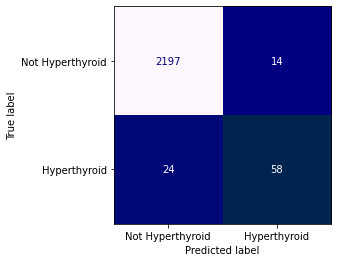

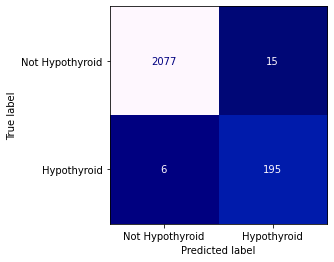

In [70]:
## Error analysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

hyper_conf = confusion_matrix(rhyperY, rhyperX_pred)
hypo_conf = confusion_matrix(rhypoY, rhypoX_pred)

hyper_disp = ConfusionMatrixDisplay(hyper_conf, display_labels=['Not Hyperthyroid', 'Hyperthyroid'])
hypo_disp = ConfusionMatrixDisplay(hypo_conf, display_labels=['Not Hypothyroid', 'Hypothyroid'])

hyper_disp.plot(cmap='gist_ncar',colorbar=False)

hypo_disp.plot(cmap='gist_ncar', colorbar=False)


Training Set Confusion Matrices


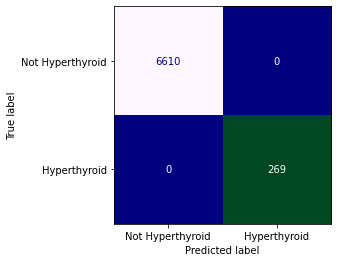

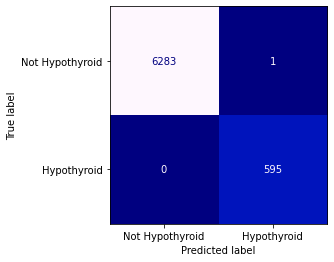

In [73]:
############################# Training Confusion Matrix ################################

hyper_conf_train = confusion_matrix(rhyperYtrain, rhyperX_trainpred)
hypo_conf_train = confusion_matrix(rhypoYtrain, rhypoX_trainpred)

hyper_disp_train = ConfusionMatrixDisplay(hyper_conf_train, display_labels=['Not Hyperthyroid', 'Hyperthyroid'])
hypo_disp_train = ConfusionMatrixDisplay(hypo_conf_train, display_labels=['Not Hypothyroid', 'Hypothyroid'])

print('Training Set Confusion Matrices')
hyper_disp_train.plot(cmap='gist_ncar',colorbar=False)
hypo_disp_train.plot(cmap='gist_ncar', colorbar=False)

## Summary and conclusion

_Using this cell, please write a short, clear paragraph describing how your results answer or do not answer your question. What new questions arise from your work? It's OK to use bullet points._

The multioutput random forest classifier performs fairly well on the thyroid0387 UCI dataset, with a recall of about 75% for all classes and of 98% and 99% for hyperthyroidism and hypothyroidism, respectively. The precision for all classes was about 83%, and for hyperthyroidism and hypothyroidism was also 98% and 99%, respectively.  The dataset used was primarily full of "normal" classes, ie not hyper- or hypo-thyroid, so 75% of the dataset was used for the trianing data, with only 25% used for the testing data. Additionally, there were more hypothyroid cases than there were hyperthyroid cases, which explains the higher performance for hypothyroidism. 

Data was imputed with random values within the "normal" range and a general category for "hyperthyroidism" and "hypothyroidism" was added to the array of classes, and the model was tuned by iterating through n_estimators and max_depth to maximize for recall, as it is most important for an initial screening to capture as many true positives as possible. 

It would be beneficial to look into the confusion matrices for the other classes to see how the model performs for each class. Additionally, this model would benefit from more data before determining its performance in a use-case scenario. 
However, in a theoretical use-case scenario it might be used to predict the main hyperthyroid and hypothyroid cases, while also serving to give probabilities/predictions for the more specific classes/diagnoses. 

In [71]:
################################## ADDITIONAL CODE NOT USED #################################################################################

#confusion matrices for the precision and f1 optimized classifiers

############################################# General Results for Precision #####################################################################

#phyperX_pred=pmultiRF.predict(x_test)
#phyperX_pred = phyperX_pred[:,20]
#phyperY = y_test[:,20]

#print("General Hyperthyroidism Precision:"" ""%0.4f" % precision_score(phyperY, phyperX_pred, average='weighted',zero_division=0))
#print("General Hyperthyroidism Recall:"" ""%0.4f" % recall_score(phyperY, phyperX_pred,average='weighted', zero_division=0))
#print("General Hyperthyroidism F1 Score:"" ""%0.4f" % f1_score(phyperY, phyperX_pred,average='weighted',zero_division=0))

#phypoX_pred=pmultiRF.predict(x_test)
#phypoX_pred = phypoX_pred[:,21]
#phypoY = y_test[:,21]

#print('\n')
#print("General Hypothyroidism Precision:"" ""%0.4f" % precision_score(phypoY, phypoX_pred, average='weighted',zero_division=0))
#print("General Hypothyroidism Recall:"" ""%0.4f" % recall_score(phypoY, phypoX_pred,average='weighted', zero_division=0))
#print("General Hypothyroidism F1 Score:"" ""%0.4f" % f1_score(phypoY, phypoX_pred,average='weighted',zero_division=0))


############################################# General Results for F1 ###############################################################################

#f1hyperX_pred=f1multiRF.predict(x_test)
#f1hyperX_pred = f1hyperX_pred[:,20]
#f1hyperY = y_test[:,20]

#print("General Hyperthyroidism Precision:"" ""%0.4f" % precision_score(f1hyperY, f1hyperX_pred, average='weighted',zero_division=0))
#print("General Hyperthyroidism Recall:"" ""%0.4f" % recall_score(f1hyperY, f1hyperX_pred,average='weighted', zero_division=0))
#print("General Hyperthyroidism F1 Score:"" ""%0.4f" % f1_score(f1hyperY, f1hyperX_pred,average='weighted',zero_division=0))

#f1hypoX_pred=f1multiRF.predict(x_test)
#f1hypoX_pred = f1hypoX_pred[:,21]
#f1hypoY = y_test[:,21]

#print('\n')
#print("General Hypothyroidism Precision:"" ""%0.4f" % precision_score(f1hypoY, f1hypoX_pred, average='weighted',zero_division=0))
#print("General Hypothyroidism Recall:"" ""%0.4f" % recall_score(f1hypoY, f1hypoX_pred,average='weighted', zero_division=0))
#print("General Hypothyroidism F1 Score:"" ""%0.4f" % f1_score(f1hypoY, f1hypoX_pred,average='weighted',zero_division=0))

